<a href="https://colab.research.google.com/github/Foysal348/Pandas/blob/main/Exploratory_Data_Analysis_with_Pandas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA is the process of examining data sets to summarize their main characteristics using:

1.Statistics (mean, median, etc.)

2.Visualization (plots, charts)

3.Correlation analysis

4.Data distribution

EDA helps to:
1. Detect patterns
2. Identify outliers
3. Understand relationships between variables
4.  Prepare data for modeling

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/sample_data/weather_data.csv")
df.head(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C
2,3,12.0,149.0,12.6,74,5,3,2025,74,PS
3,4,18.0,313.0,11.5,62,5,4,2025,62,S
4,5,NaN,NaN,14.3,56,5,5,2025,56,S
5,6,28.0,NaN,14.9,66,5,6,2025,66,C
6,7,23.0,299.0,8.6,65,5,7,2025,65,PS
7,8,19.0,99.0,13.8,59,5,8,2025,59,C
8,9,8.0,19.0,20.1,61,5,9,2025,61,PS
9,10,NaN,194.0,8.6,69,5,10,2025,69,S


### Statical Describetion

In [123]:
df.describe(include="object")

,Temp C,Month,Weather
count,161,161,158
unique,41,6,3
top,81,9,S
freq,11,35,59


In [124]:
#Calculate Variance
df.var(numeric_only=True)
#Calculate Mean
df.mean(numeric_only=True)
#Calculate Kurtosis that Measures the "tailedness" of the probability distribution
df.kurt(numeric_only=True)
#Calculate skewness that Measures the asymmetry of the probability distribution
df.skew(numeric_only=True)

,0
Unnamed: 0,-0.000891
Ozone,1.257618
Solar.R,-0.418749
Wind,0.377375
Day,-0.029124
Year,0.000000
Temp,-0.322533


# Data Preparation

###Check Duplicate values

In [125]:
#df.duplicated().sum()#Column-wise
df.loc[df.duplicated()]#Row-wise

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
84,70,97.0,272.0,5.7,92,7,9,2025,92,C
155,154,41.0,190.0,7.4,67,5,1,2025,67,C
160,158,18.0,131.0,8.0,76,9,29,2025,76,C


###Remove Duplicate values

In [126]:
df.drop_duplicates(ignore_index=True)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C
2,3,12.0,149.0,12.6,74,5,3,2025,74,PS
3,4,18.0,313.0,11.5,62,5,4,2025,62,S
4,5,NaN,NaN,14.3,56,5,5,2025,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2025,67,C
154,155,30.0,193.0,6.9,70,9,26,2025,70,PS
155,156,NaN,145.0,13.2,77,9,27,2025,77,S
156,157,14.0,191.0,14.3,75,9,28,2025,75,S


###Drop Unnecessary Columns

In [127]:
df=df.drop(["Unnamed: 0","Temp C"],axis=1)
df.head(5)

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,NaN,14.3,5,5,2025,56,S


###Rename Solar.R to Solar

In [128]:

df=df.rename({"Solar.R":"Solar"},axis=1)
df.head()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,NaN,14.3,5,5,2025,56,S


###Check missing value

In [129]:
df.isna().sum()

,0
Ozone,38
Solar,7
Wind,0
Month,0
Day,0
Year,0
Temp,0
Weather,3


###Handle Ozone Part

In [130]:
mean_of_Ozone=df["Ozone"].mean()
df["Ozone"]=df["Ozone"].fillna(mean_of_Ozone)
#df["Ozone"].isna().sum()
df["Ozone"]

,Ozone
0,41.000000
1,36.000000
2,12.000000
3,18.000000
4,41.837398
...,...
156,30.000000
157,41.837398
158,14.000000
159,18.000000


###Handle Solar Part

In [131]:
mean_of_Solar=df["Solar"].mean()
df["Solar"]=df["Solar"].fillna(mean_of_Solar)
#df["Solar"].isna().sum()#np.int64(0)
df["Solar"]

,Solar
0,190.000000
1,118.000000
2,149.000000
3,313.000000
4,185.642857
...,...
156,193.000000
157,145.000000
158,191.000000
159,131.000000


###Handling Month part

In [132]:
df["Month"].unique()
df["Month"]=df["Month"].replace({"May":"5"})
#df["Month"]=df["Month"].astype(str) #Converted into str
df["Month"].unique()


array(['5', '6', '7', '8', '9'], dtype=object)

###Combine Day ,Month and Year

In [133]:
df["Date"]=pd.to_datetime(df[["Year","Month","Day"]])
df["Date"]

,Date
0,2025-05-01
1,2025-05-02
2,2025-05-03
3,2025-05-04
4,2025-05-05
...,...
156,2025-09-26
157,2025-09-27
158,2025-09-28
159,2025-09-29


In [134]:
df.tail()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
156,30.000000,193.0,6.9,9,26,2025,70,PS,2025-09-26
157,41.837398,145.0,13.2,9,27,2025,77,S,2025-09-27
158,14.000000,191.0,14.3,9,28,2025,75,S,2025-09-28
159,18.000000,131.0,8.0,9,29,2025,76,C,2025-09-29
160,18.000000,131.0,8.0,9,29,2025,76,C,2025-09-29


#Data Visualization

###Boxplot

<Axes: >

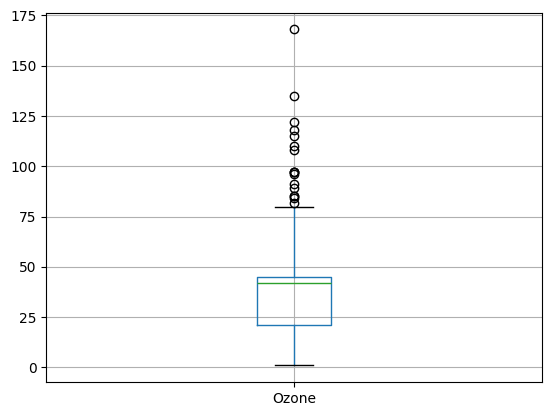

In [135]:
df.boxplot(column="Ozone")

###Pie Plot

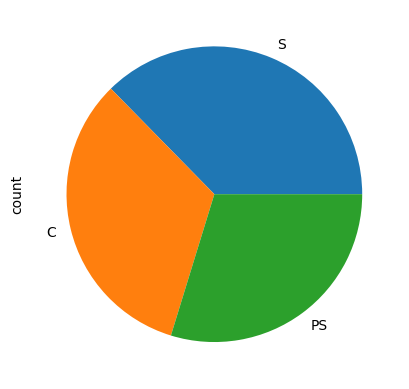

In [136]:
df["Weather"].value_counts().plot(kind="pie")
#plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'hexbin')
plt.show()

###Bar Plot

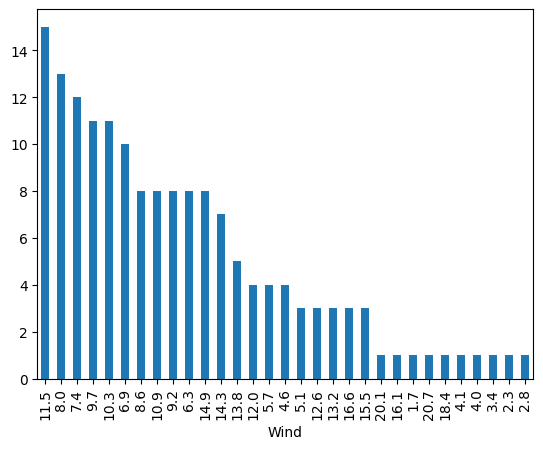

In [137]:
df["Wind"].value_counts().plot(kind="bar")
#plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie')
plt.show()

###Density Plot

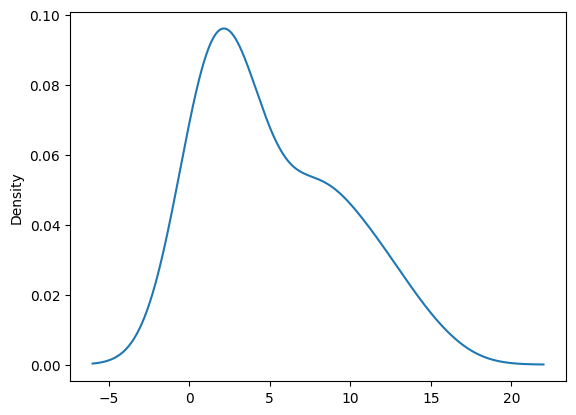

In [138]:
df["Wind"].value_counts().plot(kind="density")
#plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie')
plt.show()

###Scatter Plot

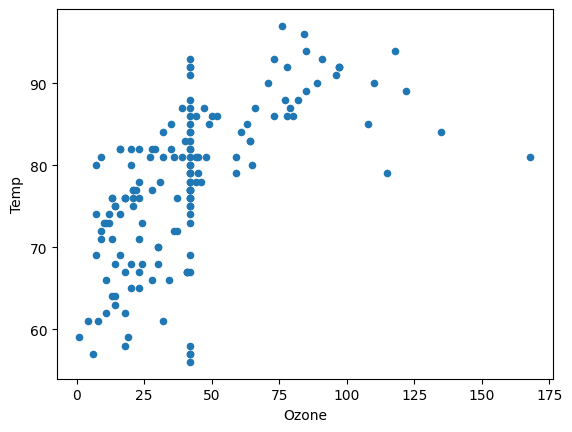

In [139]:
df.plot(kind="scatter",x='Ozone',y="Temp")
plt.show()

###Histogram with Seaborn

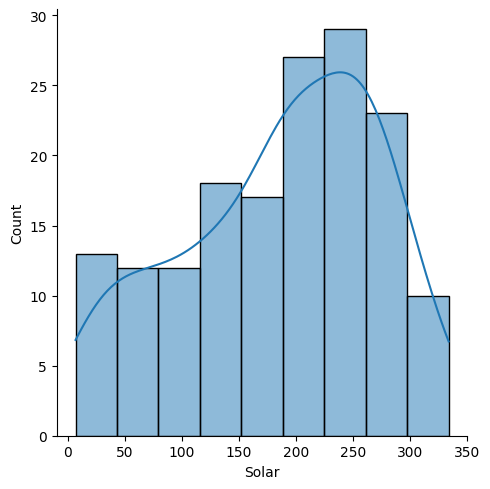

In [140]:
sns.displot(data=df,x="Solar",kind="hist",kde=True)
plt.show()

### violin plot with Seaborn

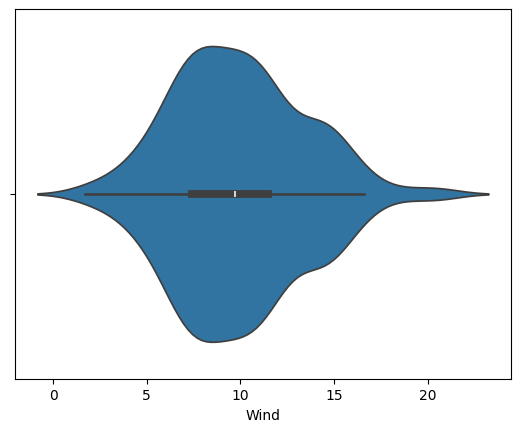

In [141]:
sns.violinplot(data=df,x="Wind")
plt.show()

###Scatter Plot with Seaborn

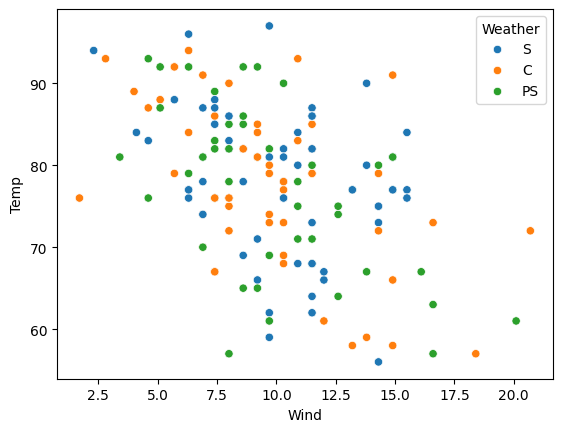

In [142]:
df["Ozone"]=pd.to_numeric(df["Ozone"])
sns.scatterplot(data=df,x='Wind',y="Temp",hue="Weather")
plt.show()

###Pair Plot with Seaborn

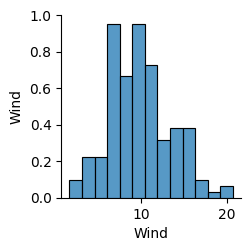

In [143]:
sns.pairplot(data=df[["Weather","Wind"]])#Single
plt.show()

###Pair Plot with Seaborn

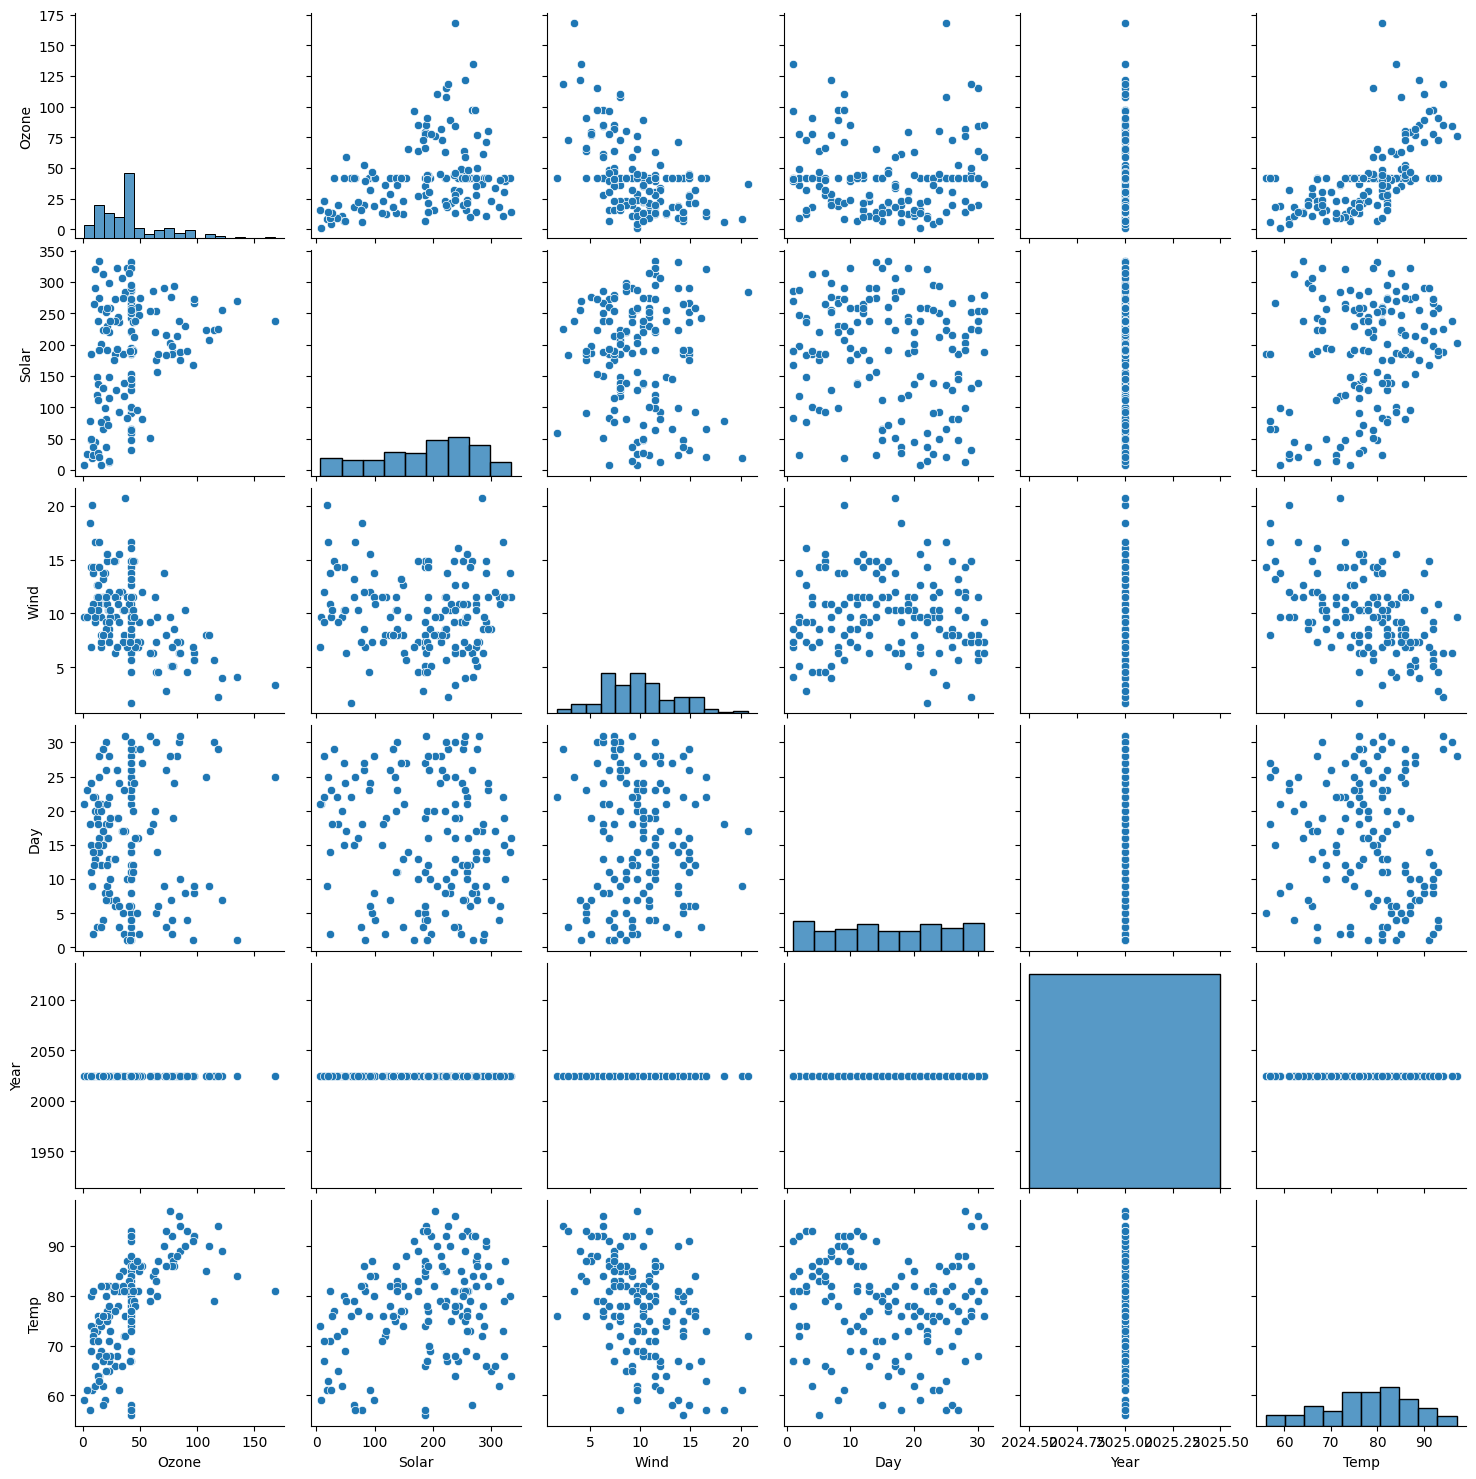

In [ ]:
sns.pairplot(data=df)#All
plt.show()

In [ ]:
df1=df.drop(["Year"],axis=1)
df1

,Ozone,Solar,Wind,Month,Day,Temp,Weather,Date
0,41.000000,190.000000,7.4,5,1,67,S,2025-05-01
1,36.000000,118.000000,8.0,5,2,72,C,2025-05-02
2,12.000000,149.000000,12.6,5,3,74,PS,2025-05-03
3,18.000000,313.000000,11.5,5,4,62,S,2025-05-04
4,41.837398,185.642857,14.3,5,5,56,S,2025-05-05
...,...,...,...,...,...,...,...,...
156,30.000000,193.000000,6.9,9,26,70,PS,2025-09-26
157,41.837398,145.000000,13.2,9,27,77,S,2025-09-27
158,14.000000,191.000000,14.3,9,28,75,S,2025-09-28
159,18.000000,131.000000,8.0,9,29,76,C,2025-09-29


###Pair Plot with Color Coding

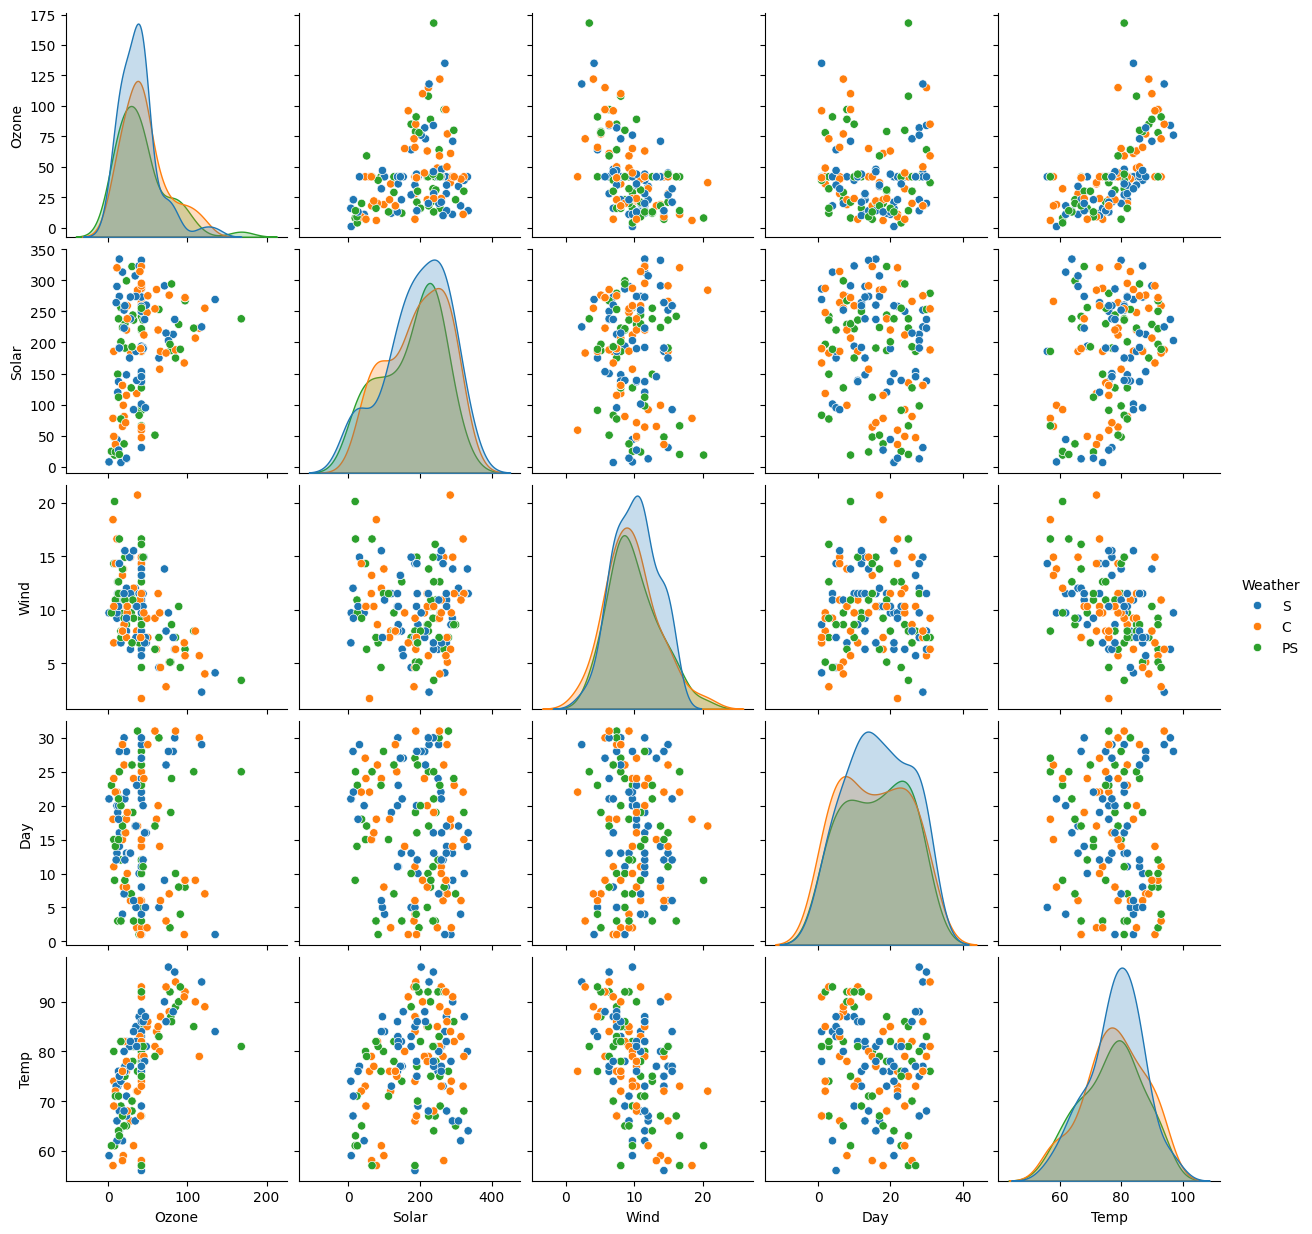

In [144]:
sns.pairplot(data=df1,hue="Weather")#hue adds color coding based on weather
plt.show()

###Heat Map

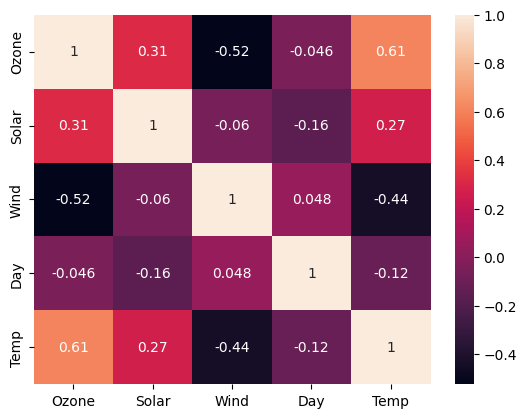

In [145]:
sns.heatmap(df1.corr(numeric_only=True),annot=True)
plt.show()

###Line Plot

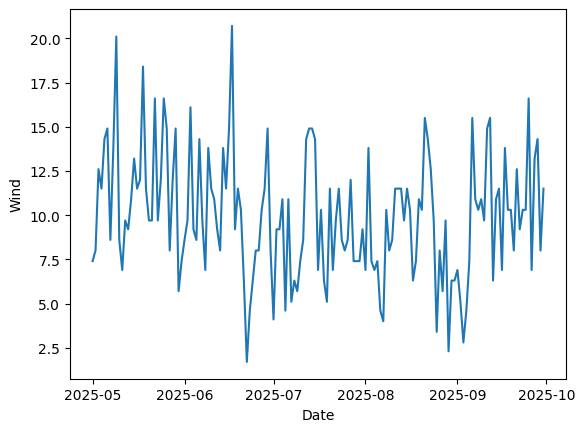

In [ ]:
sns.lineplot(data=df,x="Date",y="Wind")
plt.show()